#  Spatio-Temporal Weather Prediction for Missouri using ConvLSTM
### Authors: Chengxuan Lyu & Jindong Xu]  


## **1. Introduction**

### **1.1. Abstract**

  This project aims to improve **short-term weather forecasting accuracy** using a **spatiotemporal deep learning approach**, specifically **ConvLSTM**. Traditional **numerical weather prediction (NWP)** models, while effective, often struggle with **extreme weather conditions** and require **significant computational resources**.

  By leveraging **high-resolution historical climate datasets (NClimGrid-Daily)** and **NASA Global Land Data Assimilation System Version 2 (GLDAS-2)**, we will develop a deep-learning model capable of capturing both **spatial and temporal dependencies** in weather patterns. 

.



### **1.2. Motivation**

The **increasing unpredictability of weather patterns** has led to growing concerns across various sectors. In recent years, extreme weather events have caused significant economic losses and disruptions to public safety. For instance, reports indicate that global climate-related disasters contribute to approximately $16 million in financial losses every hour, emphasizing the urgent need for more reliable forecasting models (World Economic Forum, 2023). Similarly, 2023 saw record-breaking floods and heatwaves across Europe, with estimated damages exceeding €13.4 billion (Caixin Science, 2024). These incidents highlight the inadequacy of traditional forecasting methods, which often fail to provide timely and accurate predictions for extreme weather conditions.

  Current numerical weather prediction (NWP) models, while effective for general forecasting, struggle with real-time updates and require high computational resources, leading to delays in predictions. Their reliance on approximate physical equations also limits their ability to accurately model the complex, nonlinear relationships governing atmospheric systems. This gap in forecasting capability presents a critical challenge for climate resilience and disaster preparedness.
  
 Advancements in deep learning, particularly ConvLSTM (Convolutional Long Short-Term Memory), offer an opportunity to improve shortand longterm weather prediction by capturing spatiotemporal dependencies in meteorological data. Unlike traditional models, which rely primarily on physics-based simulations, ConvLSTM can learn from historical trends and generate highly localized forecasts. This project seeks to bridge the gap between conventional and data-driven forecasting techniques by enhancing prediction accuracy, reducing computational costs, and providing faster real-time insights.


### **1.2. Decisions to be impacted**

   Accurate weather forecasting plays a crucial role in various industries, enabling better decision-making and reducing potential risks through improved predictions.
   
   In agriculture, precise short-term forecasts help farmers optimize irrigation schedules, determine planting and harvesting times, and prevent losses due to unexpected weather shifts. Studies have shown that better climate predictions can increase agricultural yield and reduce financial risks for farmer).
   
   In transportation and logistics, weather conditions significantly impact flight schedules, road safety, and maritime routes. More reliable forecasts allow companies to preemptively reroute shipments, reschedule flights, and implement necessary safety measures to minimize disruptions. Similarly, in the energy sector, particularly for renewable sources such as solar and wind power, accurate weather data enables more efficient grid management and energy distribution, reducing dependency on nonrenewable backups.
   
   Disaster management and emergency response also benefit from improved short-term forecasts. Extreme weather events, including storms, heatwaves, and floods, pose severe threats to local communities. The ability to anticipate such events earlier allows emergency response teams to allocate resources effectively, issue timely warnings, and implement evacuation strategies when necessary. Enhancing short-term prediction models directly contributes to public safety and economic stability, reinforcing the need for innovative forecasting solution.

### **1.3. Business Value**

  Accurate short and long term weather forecasting is essential for **economic stability** and **public safety**. Extreme weather events are becoming more frequent, leading to billions in economic losses and thousands of casualties annually. Traditional models often fail to provide timely, high-resolution forecasts, limiting preparedness and response efforts.
  
  From a **business perspective**, improved forecasting benefits the agriculture, transportation, and energy sectors. Farmers can optimize irrigation and harvesting, reducing crop losses by up to 25%. Airlines and shipping companies can adjust routes to minimize weather-related delays, while renewable energy providers can better balance power grid fluctuations based on expected wind and solar output.
  
  From a **societal perspective**, more accurate forecasts enhance disaster preparedness. In 2023, over 61,000 deaths in Europe were linked to extreme heat events. Reliable short-term predictions allow authorities to issue timely warnings, saving lives and reducing infrastructure damage.
  
  By integrating ConvLSTM-based deep learning, this project aims to bridge gaps in current forecasting, ensuring faster, more precise predictions that drive better decision-making across industries and government sectors.

### **1.4. Personal and Research Significance**

  Weather forecasting is not only a scientific challenge but also a field with profound real-world impact. As extreme weather events become more frequent and unpredictable, the need for more accurate, data-driven forecasting methods is greater than ever. This project is particularly important because it aligns with both personal research interests and the broader goal of advancing climate resilience through deep learning techniques.
  
   From a technical perspective, this project presents an opportunity to explore **ConvLSTM, a cutting-edge approach that integrates convolutional and recurrent neural networks to model spatiotemporal dependencies**. Traditional forecasting methods often fail to efficiently capture these dependencies, making this an exciting problem where deep learning can offer tangible improvements. Working on this project allows for hands-on experience in processing large-scale climate data, optimizing deep learning models, and evaluating predictive performance, all of which are critical skills in the growing field of AI-driven environmental science.
   
   Beyond the technical aspects, the societal relevance of this research makes it deeply meaningful. Improved forecasting models have the potential to save lives, protect communities, and minimize economic losses caused by extreme weather. By focusing on short-term predictions, this project can contribute to disaster preparedness, energy management, and agricultural stability, areas that directly affect millions of people. As climate change continues to pose global challenges, developing better forecasting tools is not just a research interest but also a practical step toward building a more resilient future.

## **2. Datasets**

### **2.1. NClimGrid-Daily Data Set**
This dataset was retrived from **National Centers for Environmental Information(NCEI)**  https://www.ncei.noaa.gov/products/land-based-station/nclimgrid-daily.

The website provides direct download links to the compressed raw meteorological data file on a monthly basis, and this site supports concurrency downloads.

The original Data is stored in nc format, that is, **NetCDF (network Common Data Form) format**, which contains the meteorological data of the continental United States. We extracted the information, divided the data **from 2011 to 2022, LAT_MIN, LAT_MAX = 33, 43, LON_MIN, LON_MAX = -105, -85 (about the range around Missouri)** and rewrote the data into CSV format for research.5

The dataset consists of **Latitude**, **Longitude**, **time**, **avrage temperature(tavg)** and **amount of rain(pcrp)** of each daily data point.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
from scipy.stats import chi2
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.covariance import MinCovDet

In [7]:
csv_file_path = r"G:/merged_nc_data.csv"
df = pd.read_csv(csv_file_path)
print(f"dataset: {csv_file_path}")


df["time"] = pd.to_datetime(df["time"], errors="coerce")
display(df.head())

lat_steps = np.unique(np.diff(np.sort(df["lat"].unique())))
lon_steps = np.unique(np.diff(np.sort(df["lon"].unique())))

date_min, date_max = df["time"].min(), df["time"].max()

print("\n--- Dataset Characteristics ---")
print(f"Latitude Step Sizes: {lat_steps}")
print(f"Longitude Step Sizes: {lon_steps}")
print(f"Date Range: {date_min} to {date_max}")
print("-" * 50)

dataset: G:/merged_nc_data.csv


,lat,lon,prcp,tavg,time
0,34.020832,-95.979164,0.0,4.828125,2011-01-01
1,34.020832,-95.937500,0.0,4.960938,2011-01-01
2,34.020832,-95.895836,0.0,5.289062,2011-01-01
3,34.020832,-95.854164,0.0,5.468750,2011-01-01
4,34.020832,-95.812500,0.0,5.632812,2011-01-01



--- Dataset Characteristics ---
Latitude Step Sizes: [0.041664 0.041668]
Longitude Step Sizes: [0.041664 0.041672]
Date Range: 2011-01-01 00:00:00 to 2022-12-31 00:00:00
--------------------------------------------------


We can see that the foot steps of Latitude and Longitude is about **0.0417 degree**, which is makes the size of data file up to over 7GB and shall cost too many calculation resources.

In this way, we chose to **downsample** the dataset to **0.25 degree resolution** for further research. The specific approach is grouping values of old data points within a 0.25-degree grid, **adding up** the amount of rainfall and **averaging** the temperature of each new grids.

In [3]:
csv_file_path = r"G:/nc_data_0.25deg.csv"
df = pd.read_csv(csv_file_path)
print(f"dataset: {csv_file_path}")


df["time"] = pd.to_datetime(df["time"], errors="coerce")
display(df.head())

lat_steps = np.unique(np.diff(np.sort(df["lat"].unique())))
lon_steps = np.unique(np.diff(np.sort(df["lon"].unique())))

date_min, date_max = df["time"].min(), df["time"].max()

print("\n--- Dataset Characteristics ---")
print(f"Latitude Step Sizes: {lat_steps}")
print(f"Longitude Step Sizes: {lon_steps}")
print(f"Date Range: {date_min} to {date_max}")
print("-" * 50)

dataset: G:/nc_data_0.25deg.csv


,lat,lon,time,prcp,tavg
0,33.125,-104.875,2011-01-01,0.0,-3.23
1,33.125,-104.625,2011-01-01,0.0,-2.18
2,33.125,-104.375,2011-01-01,0.0,-1.62
3,33.125,-104.125,2011-01-01,0.0,-1.80
4,33.125,-103.875,2011-01-01,0.0,-2.70



--- Dataset Characteristics ---
Latitude Step Sizes: [0.25]
Longitude Step Sizes: [0.25]
Date Range: 2011-01-01 00:00:00 to 2022-12-31 00:00:00
--------------------------------------------------


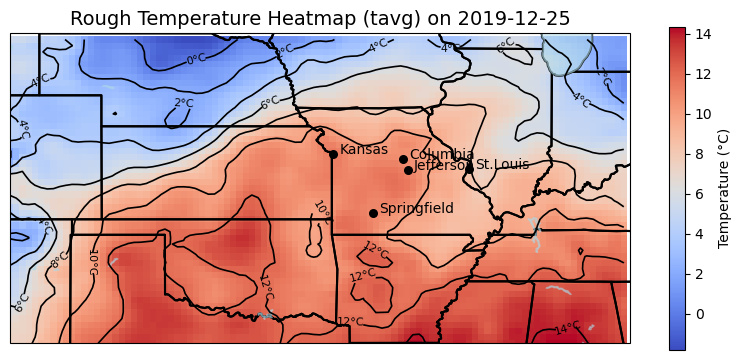

In [6]:
data_file = "G:/nc_data_0.25deg.csv"
df = pd.read_csv(data_file)

selected_date = "2019-12-25"
df_day = df[df["time"] == selected_date].dropna(subset=["lat", "lon", "tavg"])

df_day = df_day[(df_day["tavg"] > -40) & (df_day["tavg"] < 40)]

lat_min, lat_max = 33, 43
lon_min, lon_max = -105, -85
df_day = df_day[(df_day["lat"] >= lat_min) & (df_day["lat"] <= lat_max) &
                (df_day["lon"] >= lon_min) & (df_day["lon"] <= lon_max)]

grid_res = 0.2
lat_grid = np.arange(lat_min, lat_max, grid_res)
lon_grid = np.arange(lon_min, lon_max, grid_res)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

tavg_grid = griddata((df_day["lon"], df_day["lat"]), df_day["tavg"],
                     (lon_mesh, lat_mesh), method='cubic')

nan_mask = np.isnan(tavg_grid)
if np.any(nan_mask):
    tavg_grid_nearest = griddata((df_day["lon"], df_day["lat"]), df_day["tavg"],
                                 (lon_mesh, lat_mesh), method='nearest')
    tavg_grid[nan_mask] = tavg_grid_nearest[nan_mask]

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

ax.set_title(f"Rough Temperature Heatmap (tavg) on {selected_date}", fontsize=14)

ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1.5)
ax.add_feature(cfeature.LAKES, color='lightblue', alpha=0.5)

cmap = plt.cm.coolwarm
heatmap = ax.pcolormesh(lon_mesh, lat_mesh, tavg_grid, cmap=cmap, shading='auto')

contour_levels = np.arange(-10, 15, 2)
contours = ax.contour(lon_mesh, lat_mesh, tavg_grid, levels=contour_levels, colors='black', linewidths=1.2)
ax.clabel(contours, inline=True, fontsize=8, fmt="%d°C", colors='black', inline_spacing=2)

cbar = plt.colorbar(heatmap, ax=ax, orientation="vertical", shrink=0.7)
cbar.set_label("Temperature (°C)")

major_cities = {
    "Kansas": (39.0997, -94.5786),
    "St.Louis": (38.6270, -90.1994),
    "Springfield": (37.2089, -93.2923),
    "Columbia": (38.9517, -92.3341),
    "Jefferson": (38.5767, -92.1735)
}

for city, (lat, lon) in major_cities.items():
    ax.scatter(lon, lat, color='black', marker='o', s=30, transform=ccrs.PlateCarree())
    ax.text(lon + 0.2, lat, city, fontsize=10, transform=ccrs.PlateCarree())

plt.show()

### **2.2. GLDAS_CLSM025_DA1_D data set**

For meteorological forecasting, it may be effective to only consider the spatio-temporal impact and distribution of a single variable, but for **long-term forecasting** needs, it will ignore the impact of other more complex and changeable meteorological variables. For example, after snowfall, the process of melting snow will cool the temperature for a while.

This dataset was retrived from **The NASA Goddard Earth Sciences (GES) Data and Information Services Center (DISC)** https://disc.gsfc.nasa.gov/datasets/GLDAS_CLSM025_DA1_D_2.2/summary?keywords=GLDAS.

GES DISK dataset allows users to **perform dataset slicing online**, including selecting a date range, latitude and longitude range, desired features, latitude and longitude resolution, and download format. However, the links provided by the site are actually a request to the server, and the server will package and provide the required dataset based on request of the link, which could cause server stress. Because of this, GES DISK does not approve concurrency downloads of costumised data. 

The GLDAS date and latitude and longitude range are selected the same as the NClimGrid-Daily dataset. To allow the model to capture more complex and variable weather patterns, we chose much more features for this GLDAS dataset, including：

- **AvgSurfT_tavg** = Average surface skin temperature (K)
- **Evap_tavg** = Evapotranspiration (kg m⁻² s⁻¹)
- **Lwnet_tavg** = Net longwave radiation flux (W m⁻²)
- **Qg_tavg** = Ground heat flux (W m⁻²)
- **Qsm_tavg** = Snow melt (kg m⁻² s⁻¹)
- **SnowDepth_tavg** = Snow depth (m)
- **SoilMoist_P_tavg** = Profile soil moisture (kg m⁻²)
- **Swnet_tavg** = Net shortwave radiation flux (W m⁻²)
- **TVeg_tavg** = Transpiration (kg m⁻² s⁻¹)
- **TWS_tavg** = Terrestrial water sto
  rage (mm)


In [9]:
csv_file_path = r"G:/nasa_dataset_0.25deg.csv" 

df = pd.read_csv(csv_file_path)

df["date"] = pd.to_datetime(df[['year', 'month', 'day']])

print(f"\nDataset: {csv_file_path}")
print("First 5 rows of the dataset:")
display(df.head())

lat_steps = np.unique(np.diff(np.sort(df["lat"].unique())))
lon_steps = np.unique(np.diff(np.sort(df["lon"].unique())))

date_min, date_max = df["date"].min(), df["date"].max()

print("\n--- Dataset Characteristics ---")
print(f"Latitude Step Sizes: {lat_steps}")
print(f"Longitude Step Sizes: {lon_steps}")
print(f"Date Range: {date_min} to {date_max}")
print("-" * 50)


Dataset: G:/nasa_dataset_0.25deg.csv
First 5 rows of the dataset:


,year,month,day,lon,lat,Swnet_tavg,Lwnet_tavg,Qg_tavg,Evap_tavg,Qsm_tavg,AvgSurfT_tavg,SnowDepth_tavg,SoilMoist_P_tavg,TVeg_tavg,TWS_tavg,date
0,2011,1,1,-104.875,33.125,112.23339,-109.615585,-31.897457,0.000003,3.291795e-08,271.26850,2.695642e-06,943.55975,3.226096e-13,943.57104,2011-01-01
1,2011,1,1,-104.625,33.125,109.48699,-105.877144,-31.433594,0.000003,6.720577e-09,272.25668,4.920311e-07,962.64170,3.467028e-13,962.64750,2011-01-01
2,2011,1,1,-104.375,33.125,110.87828,-104.095460,-31.209526,0.000003,1.537024e-09,273.09296,7.490906e-08,979.99840,1.199101e-12,980.00037,2011-01-01
3,2011,1,1,-104.125,33.125,111.35952,-101.795210,-32.019760,0.000003,1.608369e-10,272.83176,9.432563e-09,989.49880,3.621643e-13,989.49980,2011-01-01
4,2011,1,1,-103.875,33.125,115.03292,-98.305260,-33.579060,0.000003,1.327470e-10,272.49722,9.297760e-09,857.17004,-1.373235e-09,857.17090,2011-01-01



--- Dataset Characteristics ---
Latitude Step Sizes: [0.25]
Longitude Step Sizes: [0.25]
Date Range: 2011-01-01 00:00:00 to 2022-12-31 00:00:00
--------------------------------------------------


Then we **merge** the two datasets together.

In [10]:
csv_file_path = r"G:/merged_climate_data.csv" 
df = pd.read_csv(csv_file_path)
display(df.head())

,lat,lon,prcp,tavg,year,month,day,Swnet_tavg,Lwnet_tavg,Qg_tavg,Evap_tavg,Qsm_tavg,AvgSurfT_tavg,SnowDepth_tavg,SoilMoist_P_tavg,TVeg_tavg,TWS_tavg
0,33.125,-104.875,0.0,-3.23,2011,1,1,112.23339,-109.615585,-31.897457,0.000003,3.291795e-08,271.26850,2.695642e-06,943.55975,3.226096e-13,943.57104
1,33.125,-104.625,0.0,-2.18,2011,1,1,109.48699,-105.877144,-31.433594,0.000003,6.720577e-09,272.25668,4.920311e-07,962.64170,3.467028e-13,962.64750
2,33.125,-104.375,0.0,-1.62,2011,1,1,110.87828,-104.095460,-31.209526,0.000003,1.537024e-09,273.09296,7.490906e-08,979.99840,1.199101e-12,980.00037
3,33.125,-104.125,0.0,-1.80,2011,1,1,111.35952,-101.795210,-32.019760,0.000003,1.608369e-10,272.83176,9.432563e-09,989.49880,3.621643e-13,989.49980
4,33.125,-103.875,0.0,-2.70,2011,1,1,115.03292,-98.305260,-33.579060,0.000003,1.327470e-10,272.49722,9.297760e-09,857.17004,-1.373235e-09,857.17090


## **3. Outlier Detection**

In this project, we identify two primary sources of outliers:

### **3.1. Extreme Weather Events**

These are **naturally occurring phenomena** that can significantly disrupt or damage human activities. For example, extreme values in precipitation or temperature—such as those defined by our alert thresholds—are indicators of abnormal weather conditions. For instance, our thresholds for a 0.25° grid are: 

- **Precipitation Alerts (24-Hour Aggregated Total Precipitation):**
- 
     - **Blue Alert:** 1250 – 2500 mm  
       *May cause localized flooding in low-lying areas; caution is advised during travel
       .*
     - **Yellow Alert:** 2500 – 3750 mm  
       *Could trigger moderate flooding; enhanced preventative measures are recommend
       ed.*
     - **Orange Alert:** 3750 – 5000 mm  
       *May lead to severe flooding; urgent protective actions are requ
       ired.*
     - **Red Alert:** >5000 mm  
       *Could trigger catastrophic flooding; immediate evacuation and rescue efforts are necessary.*

- **Temperature Alerts (Daily Average Temperature):**
- 
     - **Blue Alert:** 30 – 32 °C  
       *Early signs of heat; caution is advised to prevent heat-related illnesses
       .*
     - **Yellow Alert:** 33 – 34 °C  
       *Significantly hot conditions; reduction of prolonged outdoor activities is recommend
       ed.*
     - **Orange Alert:** 35 – 36 °C  
       *Severe heat that may lead to heat exhaustion or heat stroke; protective measures are requ
       ired.*
     - **Red Alert:** ≥ 37 °C  
       *Extreme heat with high risk; outdoor activities should be avoided and emergency measures pr
       epared.*

   These thresholds are based on scaling traditional point-based (meteorological station) standards to our 0.25° grid, where the precipitation values are summed from finer resolution cells (assumed to be 0.05° per cell).



### **3.2. Measurement or Transcription Errors** 

   These outliers result from errors during data collection, measurement, or transcription. Such errors can distort the analysis if not detected and corrected.

Before implementing the outlier detection procedures, we first conducted an initial exploratory analysis of our climate dataset.

1. **Descriptive Statistics:**  
    
   - The code calculates summary statistics (mean, standard deviation, min, max, etc.) for each variable.
   - Skewness and kurtosis are computed to understand the shape and tail behavior of each variable’s distribution.

2. **Visualization:**

   - Histograms (with kernel density estimates) are plotted for each feature to visually inspect their distributions and confirm that they are suitable for further outlier analysis.

3. **Scale and Distribution Checks:**  
    
   - The maximum-to-minimum ratio for each variable is calculated to identify any scale-related issues.
   - Variables with exceptionally high ratios (above 1e5) or significant skew (absolute skewness > 2) are flagged. This helps ensure that all variables can be effectively processed by our outlier detection methods.

All columns: ['lat', 'lon', 'prcp', 'tavg', 'year', 'month', 'day', 'Swnet_tavg', 'Lwnet_tavg', 'Qg_tavg', 'Evap_tavg', 'Qsm_tavg', 'AvgSurfT_tavg', 'SnowDepth_tavg', 'SoilMoist_P_tavg', 'TVeg_tavg', 'TWS_tavg']
Selected feature columns: ['prcp', 'tavg', 'Swnet_tavg', 'Lwnet_tavg', 'Qg_tavg', 'Evap_tavg', 'Qsm_tavg', 'AvgSurfT_tavg', 'SnowDepth_tavg', 'SoilMoist_P_tavg', 'TVeg_tavg', 'TWS_tavg']

=== Describe ===
               prcp          tavg    Swnet_tavg    Lwnet_tavg       Qg_tavg  \
count  1.393235e+07  1.393235e+07  1.391482e+07  1.391482e+07  1.391482e+07   
mean   8.997363e+01  1.326819e+01  1.378365e+02 -4.964548e+01  3.102428e-04   
std    2.664805e+02  1.061858e+01  6.319620e+01  2.665364e+01  1.793726e+01   
min    0.000000e+00 -3.141000e+01  1.901897e+00 -1.602328e+02 -1.827286e+02   
25%    0.000000e+00  5.380000e+00  8.707977e+01 -6.973837e+01 -8.460871e+00   
50%    0.000000e+00  1.414000e+01  1.366669e+02 -5.163146e+01  2.557432e+00   
75%    2.643000e+01  2.239000e

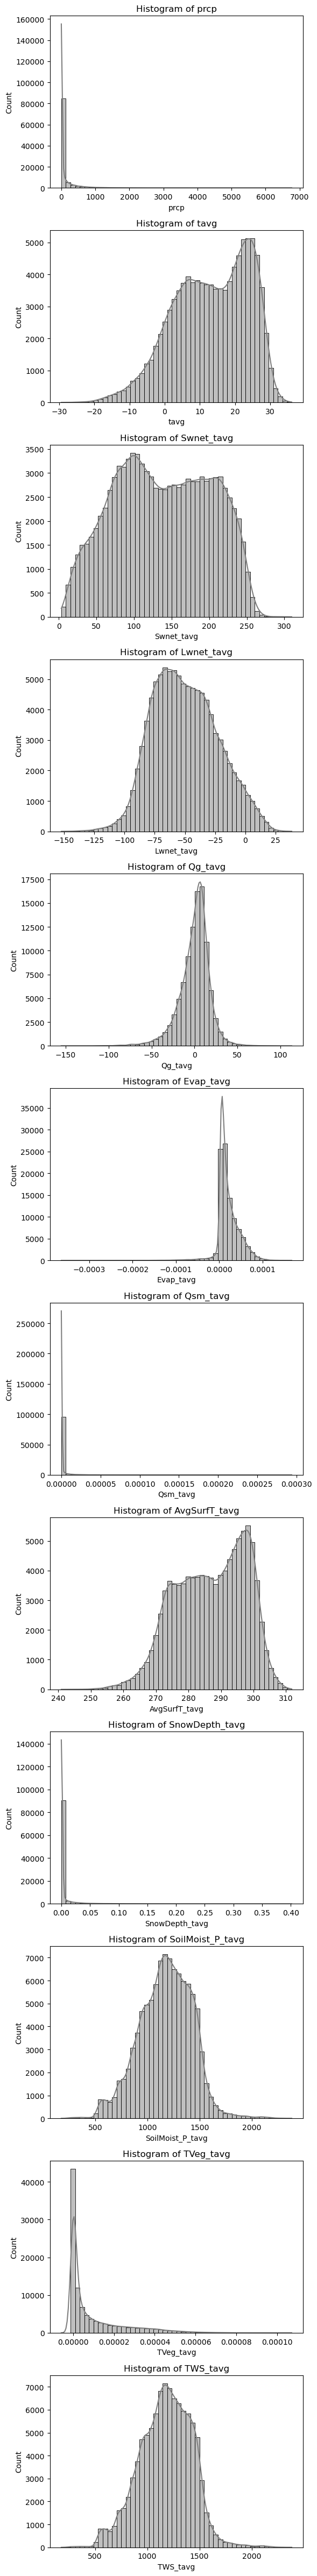


=== Max/Min Ratio for each column ===
prcp: ratio = inf
tavg: ratio = 1.1862e+00
Swnet_tavg: ratio = 1.7030e+02
Lwnet_tavg: ratio = 5.7285e-01
Qg_tavg: ratio = 6.8674e-01
Evap_tavg: ratio = 5.5051e-01
Qsm_tavg: ratio = inf
AvgSurfT_tavg: ratio = 1.3052e+00
SnowDepth_tavg: ratio = inf
SoilMoist_P_tavg: ratio = 1.4151e+01
TVeg_tavg: ratio = 7.5668e+00
TWS_tavg: ratio = 1.4151e+01

=== Potentially Problematic Columns ===
Column 'prcp' might need transform. ratio=inf, skew=5.35
Column 'Qsm_tavg' might need transform. ratio=inf, skew=13.85
Column 'SnowDepth_tavg' might need transform. ratio=inf, skew=6.84


In [25]:
csv_file_path = r"G:/merged_climate_data.csv"  
df = pd.read_csv(csv_file_path)

exclude_cols = ["lat", "lon", "year", "month", "day"]
all_cols = df.columns.tolist()
feature_cols = [c for c in all_cols if c not in exclude_cols]

print("All columns:", all_cols)
print("Selected feature columns:", feature_cols)

data = df[feature_cols].copy()

print("\n=== Describe ===")
print(data.describe())

print("\n=== Skew ===")
print(data.skew(numeric_only=True))

print("\n=== Kurtosis ===")
print(data.kurt(numeric_only=True))

sample_data = data.sample(n=100000, random_state=42) if len(data) > 100000 else data

num_cols = len(feature_cols)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(6, 4*num_cols))
if num_cols == 1:
    axes = [axes]  

for i, col in enumerate(feature_cols):
    ax = axes[i]
    sns.histplot(sample_data[col], bins=50, kde=True, ax=ax, color="gray")
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()

ratio_info = {}
for col in feature_cols:
    col_min = data[col].min()
    col_max = data[col].max()
    if col_min == 0:
        ratio = np.inf if col_max != 0 else 1
    else:
        ratio = abs(col_max / col_min) if col_min != 0 else np.inf
    ratio_info[col] = ratio

print("\n=== Max/Min Ratio for each column ===")
for c, r in ratio_info.items():
    print(f"{c}: ratio = {r:.4e}")

skew_vals = data.skew(numeric_only=True)
threshold_ratio = 1e5
threshold_skew = 2

print("\n=== Potentially Problematic Columns ===")
for col in feature_cols:
    col_ratio = ratio_info[col]
    col_skew = skew_vals[col]
    if (col_ratio > threshold_ratio) or (abs(col_skew) > threshold_skew):
        print(f"Column '{col}' might need transform. ratio={col_ratio:.2e}, skew={col_skew:.2f}")

We can see that due to too many zero data points, pcrp, Qsm_tavg and SnowDepth_tavg are exteremely skewed and **cannot implement tranditional ordinary outlier detection methods directly** on them. 

In this way, we chose to use a Hurdle Model approach to deal with these three features. 

1. **Segmented Processing**
The data is split into two parts:

  - **Zero Values:** Most observations with a value of 0 are considered normal (or can be handled separately).

  - **Positive Values:** For values greater than 0, we assume that the data follows a right-skewed, continuous, zero-truncated distribution.

2. **Model Fitting and Residual Analysis**
- **Gamma Model Fitting:**  
  We fit a Gamma model containing only an intercept term to capture the mean of the positive part.
  
- **Residual Calculation:**  
  For each positive observation, we calculate the predicted value and the residual. These residuals are then standardized.
  
- **Anomaly Detection:**  
  An observation is flagged as an anomaly if the absolute value of its standardized residual exceeds a set threshold(we set threshold as 4).


=== Processing variable: prcp ===


D:\Anaconda\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prcp   No. Observations:              4243974
Model:                            GLM   Df Residuals:                  4243973
Model Family:                   Gamma   Df Model:                            0
Link Function:                    log   Scale:                          1.9767
Method:                          IRLS   Log-Likelihood:            -2.7955e+07
Date:                Sun, 16 Mar 2025   Deviance:                   8.8094e+06
Time:                        17:05:42   Pearson chi2:                 8.39e+06
No. Iterations:                   100   Pseudo R-squ. (CS):          3.553e-15
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6882      0.001   8334.788      0.0

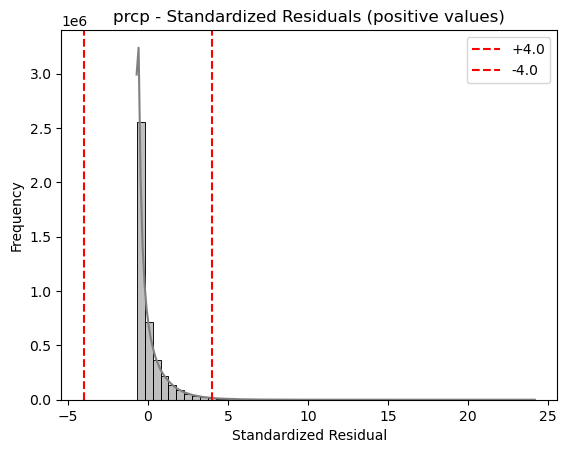

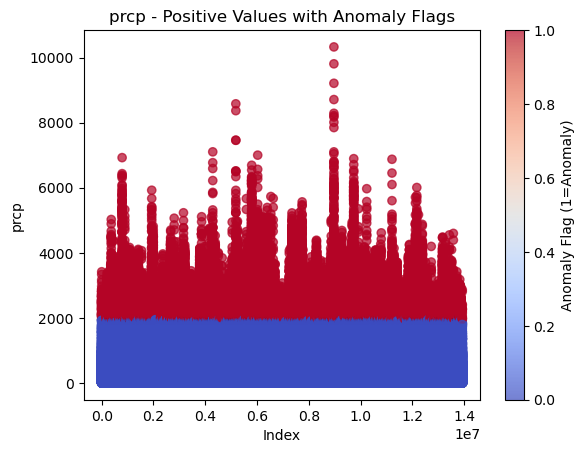


=== Processing variable: Qsm_tavg ===


D:\Anaconda\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Qsm_tavg   No. Observations:              2201568
Model:                            GLM   Df Residuals:                  2201567
Model Family:                   Gamma   Df Model:                            0
Link Function:                    log   Scale:                          5.1525
Method:                          IRLS   Log-Likelihood:             2.5065e+07
Date:                Sun, 16 Mar 2025   Deviance:                   9.3086e+06
Time:                        17:07:35   Pearson chi2:                 1.13e+07
No. Iterations:                    10   Pseudo R-squ. (CS):          3.331e-15
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7493      0.002  -7680.161      0.0

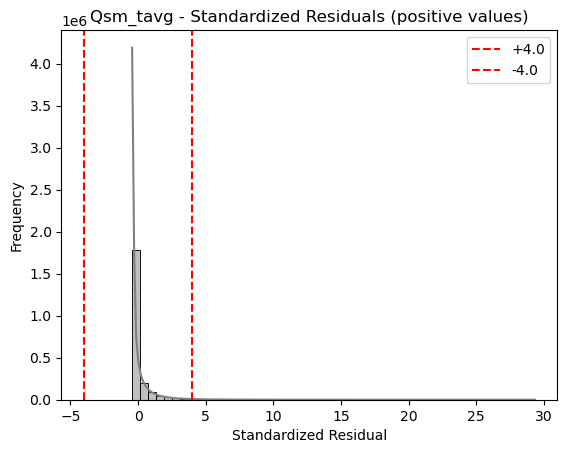

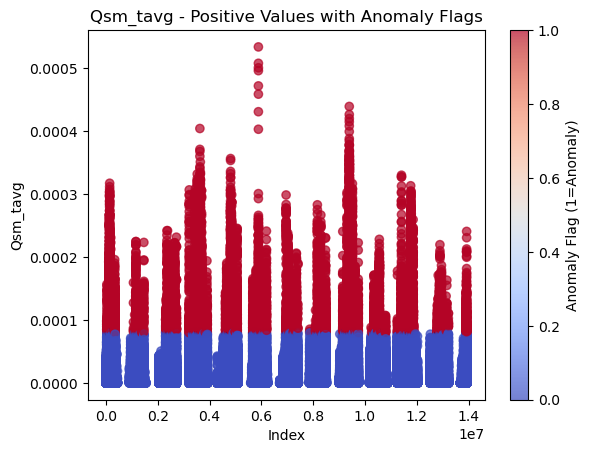


=== Processing variable: SnowDepth_tavg ===


D:\Anaconda\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:         SnowDepth_tavg   No. Observations:              2915867
Model:                            GLM   Df Residuals:                  2915866
Model Family:                   Gamma   Df Model:                            0
Link Function:                    log   Scale:                          2.9813
Method:                          IRLS   Log-Likelihood:             1.0466e+07
Date:                Sun, 16 Mar 2025   Deviance:                   1.2418e+07
Time:                        17:08:38   Pearson chi2:                 8.69e+06
No. Iterations:                    10   Pseudo R-squ. (CS):          1.332e-15
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8548      0.001  -3812.269      0.0

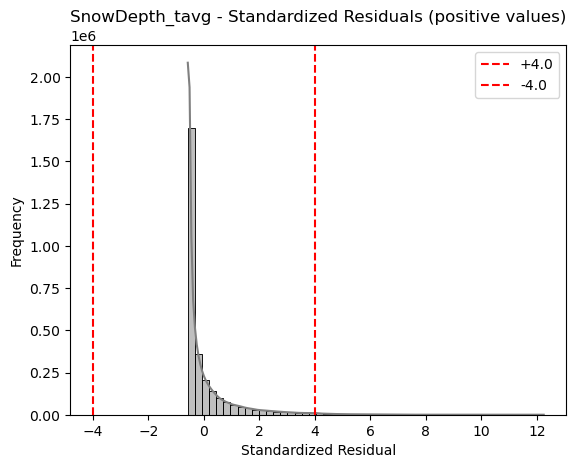

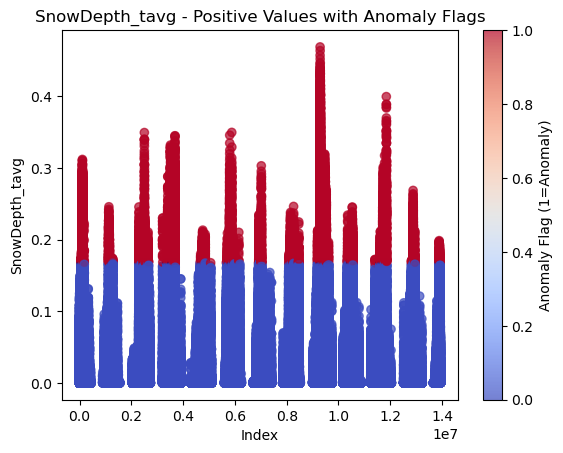

In [26]:
csv_file_path = "G:/merged_climate_data.csv" 
df = pd.read_csv(csv_file_path)

variables_zero_lot = ["prcp", "Qsm_tavg", "SnowDepth_tavg"]

date_cols = ["year", "month", "day", "lat", "lon"]

results = {}

for var in variables_zero_lot :
    print(f"\n=== Processing variable: {var} ===")
    
    data = df[[var] + date_cols].copy()
    
    data["nonzero"] = (data[var] > 0).astype(int)
    
    data_positive = data[data[var] > 0].copy()
    if data_positive.empty:
        print(f"No positive values for {var}, skip.")
        continue
    
    X = sm.add_constant(np.ones(len(data_positive)))
    y = data_positive[var]
    
    gamma_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log()))
    gamma_results = gamma_model.fit()
    print(gamma_results.summary())
    
    y_pred = gamma_results.predict(X)
    residuals = y - y_pred
    std_resid = (residuals - residuals.mean()) / residuals.std()
    data_positive["std_resid"] = std_resid
    
    threshold = 4.0  
    data_positive["anomaly"] = (std_resid.abs() > threshold).astype(int)
    
    n_anomalies = data_positive["anomaly"].sum()
    print(f"Detected anomalies (|std_resid| > {threshold}): {n_anomalies}")
    
    anomalies_df = data_positive[data_positive["anomaly"] == 1].copy()
    
    print("\nSample anomaly rows (first 5):")
    print(anomalies_df[[var, "std_resid"] + date_cols].head(5))
    
    anomalies_df.to_csv(f"{var}_anomalies.csv", index=False)
    
    plt.figure()
    sns.histplot(std_resid, bins=50, kde=True, color="gray")
    plt.axvline(threshold, color='red', linestyle='--', label=f"+{threshold}")
    plt.axvline(-threshold, color='red', linestyle='--', label=f"-{threshold}")
    plt.title(f"{var} - Standardized Residuals (positive values)")
    plt.xlabel("Standardized Residual")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.scatter(data_positive.index, data_positive[var], 
                c=data_positive["anomaly"], cmap="coolwarm", alpha=0.7)
    plt.title(f"{var} - Positive Values with Anomaly Flags")
    plt.xlabel("Index")
    plt.ylabel(var)
    plt.colorbar(label="Anomaly Flag (1=Anomaly)")
    plt.show()


After this procedure, we found pcrp has 42976 potential outlier data points, Qsm_tavg has 26924 potential outlier data points, and SnowDepth_tavg has 36007 potential outlier data points.

Our next percedure is using DBSCAN to perform spatial clustering analysis on the potential outlier data points. The basic idea is to see if the outlier data points are forming **a area between each other**, given the actual span of 0.25 resolution in reality, if a region is full of such similar outliers then it is not a measurement or recording of an outlier but a **real meteorological phenomenon**.


Processing file: prcp_anomalies.xls  (variable: prcp)
total outliers：42976
number of clusters detected：2，Isolated noise number：18
first five：
       date     lat     lon  cluster
0  2011-1-1  33.125 -89.875        0
1  2011-1-1  33.125 -89.625        0
2  2011-1-1  33.125 -89.375        0
3  2011-1-1  33.125 -89.125        0
4  2011-1-1  33.125 -88.875        0


C:\Users\lvche\AppData\Local\Temp\ipykernel_5000\2187886697.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))
C:\Users\lvche\AppData\Local\Temp\ipykernel_5000\2187886697.py:46: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(anomalies.loc[mask, "lon"],


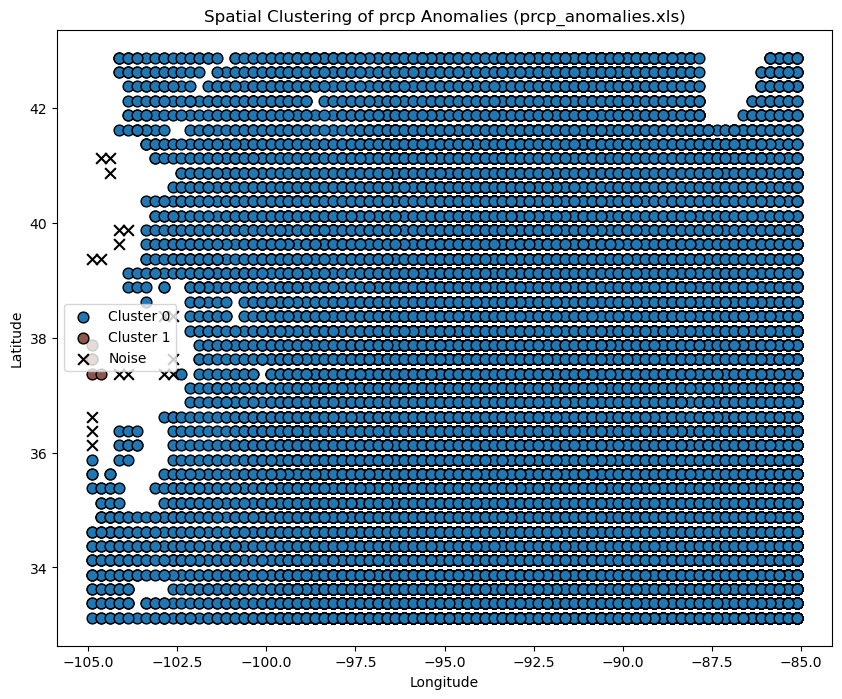


Processing file: Qsm_tavg_anomalies.xls  (variable: Qsm_tavg)
total outliers：26924
number of clusters detected：2，Isolated noise number：1
first five：
        date     lat     lon  cluster
0  2011-1-10  33.125 -86.875        0
1  2011-1-10  33.125 -86.625        0
2  2011-1-10  33.125 -86.375        0
3  2011-1-10  33.125 -86.125        0
4  2011-1-10  33.125 -85.875        0


C:\Users\lvche\AppData\Local\Temp\ipykernel_5000\2187886697.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))
C:\Users\lvche\AppData\Local\Temp\ipykernel_5000\2187886697.py:46: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(anomalies.loc[mask, "lon"],


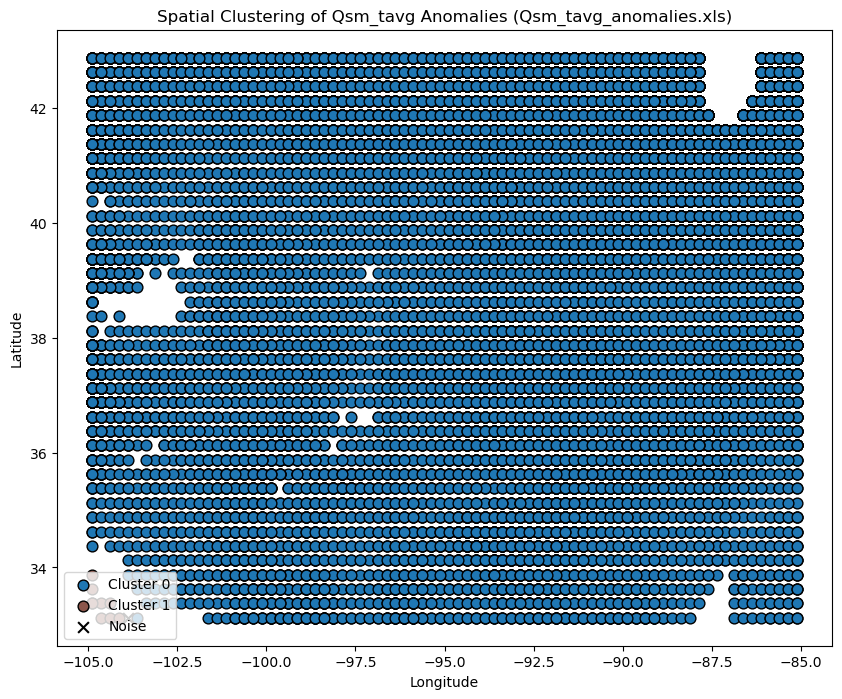


Processing file: SnowDepth_tavg_anomalies.xls  (variable: SnowDepth_tavg)
total outliers：36007
number of clusters detected：4，Isolated noise number：13
first five：
        date     lat     lon  cluster
0  2011-1-18  41.875 -94.875        0
1  2011-1-18  42.625 -95.375        0
2  2011-1-18  42.625 -95.125        0
3  2011-1-18  42.625 -94.875        0
4  2011-1-18  42.875 -95.875        0


C:\Users\lvche\AppData\Local\Temp\ipykernel_5000\2187886697.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))
C:\Users\lvche\AppData\Local\Temp\ipykernel_5000\2187886697.py:46: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(anomalies.loc[mask, "lon"],


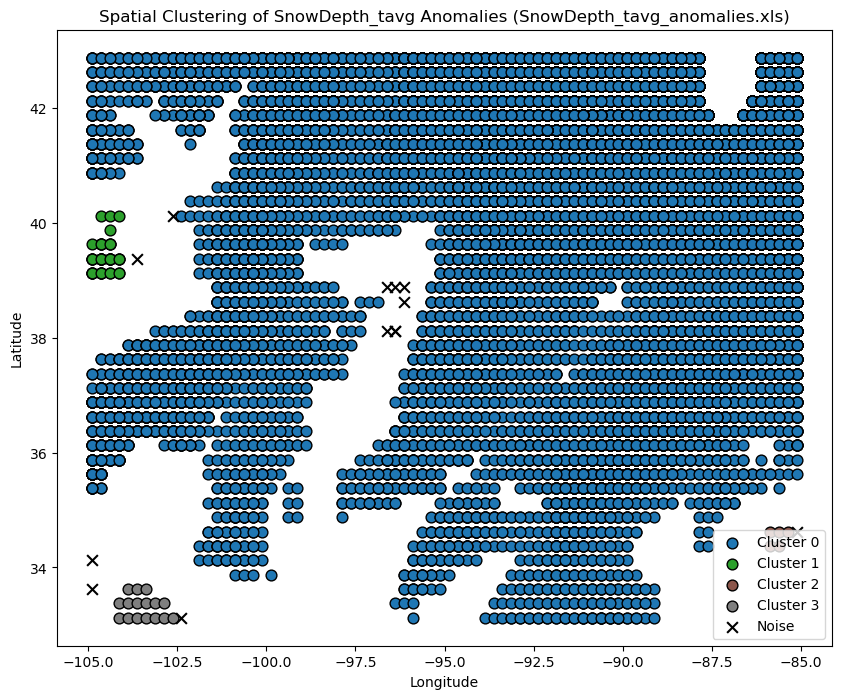

In [54]:
files = {
    "prcp_anomalies.xls": "prcp",
    "Qsm_tavg_anomalies.xls": "Qsm_tavg",
    "SnowDepth_tavg_anomalies.xls": "SnowDepth_tavg"
}

for file_name, var_name in files.items():
    csv_file_path = f"G:/{file_name}"  
    df = pd.read_csv(csv_file_path)
    
    anomalies = df[df["anomaly"] == 1].copy()
    if anomalies.empty:
        print(f"{file_name} does not have outliers")
        continue


    coords = anomalies[["lat", "lon"]].values
    dbscan = DBSCAN(eps=0.4, min_samples=5, metric="euclidean")
    cluster_labels = dbscan.fit_predict(coords)
    anomalies["cluster"] = cluster_labels
    
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise = list(cluster_labels).count(-1)
    print(f"\nProcessing file: {file_name}  (variable: {var_name})")
    print(f"total outliers：{len(anomalies)}")
    print(f"number of clusters detected：{n_clusters}，Isolated noise number：{n_noise}")

    anomalies["date"] = anomalies["year"].astype(str) + "-" + anomalies["month"].astype(str) + "-" + anomalies["day"].astype(str)
    
    print("first five：")
    print(anomalies[["date", "lat", "lon", "cluster"]].head(5))

    plt.figure(figsize=(10, 8))
    unique_labels = set(cluster_labels)
    colors = plt.cm.get_cmap("tab10", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "k"
            marker = "x"
            label_name = "Noise"
        else:
            color = colors(label)
            marker = "o"
            label_name = f"Cluster {label}"
        mask = anomalies["cluster"] == label
        plt.scatter(anomalies.loc[mask, "lon"],
                    anomalies.loc[mask, "lat"],
                    c=[color],
                    marker=marker,
                    edgecolors="k",
                    s=60,
                    label=label_name)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Spatial Clustering of {var_name} Anomalies ({file_name})")
    plt.legend()
    plt.show()
    
    # out_file = f"G:/{file_name.split('.')[0]}_clustered.csv"
    # anomalies.to_csv(out_file, index=False)
    # print(f"clustering results has been saved to: {out_file}")

For the rest of features in our dataset, we first implemented a **straigh-forward Mahalanobis distance method**. However the outcome showed threshold=NaN, Number of anomalies=0, which might means the range array is invalid. 

Then we chose to implement **Minimum Covariance Determinant (MCD)**  on 1 million-row random-selected sample to estimate a robust mean vector and covariance matrix.

MCD helps mitigate the influence of outliers on covariance estimation, making it more stable than ordinary covariance.

Then We computed Mahalanobis distance for each row in the **full** dataset (13.9 million rows) using the robust mean and covariance from the sample.
   - This step involved:
     1. Subtracting the robust mean from each standardized data point.
     2. Multiplying by the inverse of the robust covariance.
     3. Summing and taking the square root to obtain Mahalanobis distance.nce.**  

- To ensure we only flag truly extreme observations, we chose a high percentile cutoff (**99.9%**).
- At the 99.9th percentile, only the top 0.1% of distances are labeled as outliers.


After dropna, X shape: (13914816, 9)
Sample shape: (1000000, 9)
Mahalanobis distance threshold (99.9th percentile): 5298.5596
Number of detected anomalies: 13915

Sample anomaly records:
             date     lat     lon  mahal_distance   tavg  Swnet_tavg  \
102694 2011-02-02  36.125 -95.375     5434.586319  -9.64   70.500150   
102695 2011-02-02  36.125 -95.125     5480.813906  -9.12   69.937035   
102773 2011-02-02  36.375 -95.625     5309.966219 -10.26   70.421730   
102774 2011-02-02  36.375 -95.375     5675.506233  -9.87   69.658356   
102775 2011-02-02  36.375 -95.125     5812.550752  -9.12   69.486390   
102776 2011-02-02  36.375 -94.875     5630.489551  -8.86   68.816340   
102777 2011-02-02  36.375 -94.625     5348.593702  -8.89   69.091300   
102853 2011-02-02  36.625 -95.625     5310.141767 -10.66   70.460820   
102854 2011-02-02  36.625 -95.375     5789.712857 -10.56   69.409966   
102855 2011-02-02  36.625 -95.125     6036.035540  -9.98   68.864090   

        Lwnet_tavg  

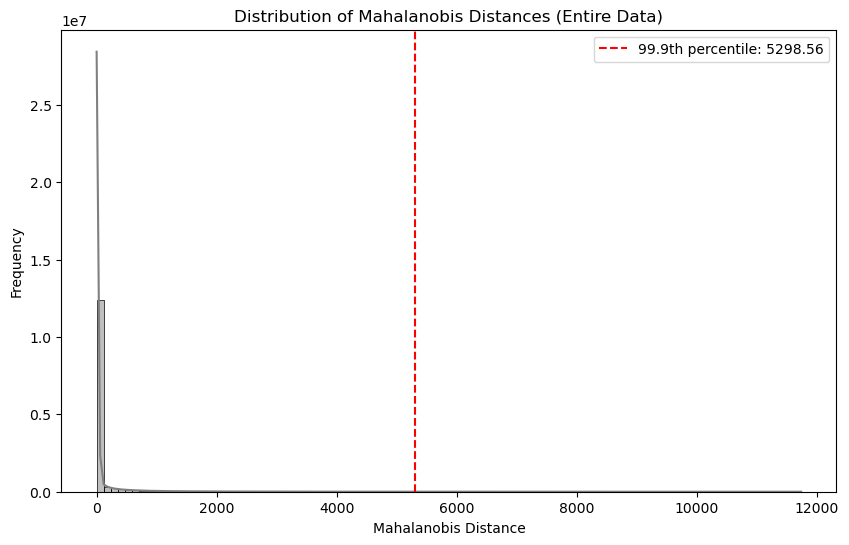

Anomaly records saved to G:/combined_anomalies_sampled.csv


In [42]:
csv_file_path = "G:/merged_climate_data.csv"  
df = pd.read_csv(csv_file_path)

feature_cols = [
    "tavg", "Swnet_tavg", "Lwnet_tavg", "Qg_tavg",
    "Evap_tavg", "AvgSurfT_tavg",
    "SoilMoist_P_tavg", "TVeg_tavg", "TWS_tavg"
]

data = df[feature_cols].copy()
data = data.dropna()  

print("After dropna, X shape:", data.shape)

sample_size = min(1000000, len(data))
sample_data = data.sample(n=sample_size, random_state=42)
print("Sample shape:", sample_data.shape)

scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(sample_data)
X_all_scaled = scaler.transform(data)

mcd = MinCovDet().fit(X_sample_scaled)
sample_mean = mcd.location_ 
sample_cov = mcd.covariance_
inv_cov = np.linalg.inv(sample_cov) 

diff_all = X_all_scaled - sample_mean
md_squared_all = np.sum(np.dot(diff_all, inv_cov) * diff_all, axis=1)
mahal_distances = np.sqrt(md_squared_all)

df_valid = df.loc[data.index].copy()  
df_valid["mahal_distance"] = mahal_distances

threshold_percentile = 99.9
threshold = np.percentile(mahal_distances, threshold_percentile)
print(f"Mahalanobis distance threshold ({threshold_percentile}th percentile): {threshold:.4f}")

df_valid["anomaly"] = (df_valid["mahal_distance"] > threshold).astype(int)
n_anomalies = df_valid["anomaly"].sum()
print(f"Number of detected anomalies: {n_anomalies}")

if {"year", "month", "day"}.issubset(df_valid.columns):
    df_valid["date"] = pd.to_datetime(df_valid[["year", "month", "day"]])
    anomaly_info = df_valid[df_valid["anomaly"] == 1][["date", "lat", "lon", "mahal_distance"] + feature_cols]
else:
    anomaly_info = df_valid[df_valid["anomaly"] == 1][["mahal_distance"] + feature_cols]

print("\nSample anomaly records:")
print(anomaly_info.head(10))

plt.figure(figsize=(10, 6))
sns.histplot(df_valid["mahal_distance"], bins=100, kde=True, color="gray")
plt.axvline(threshold, color="red", linestyle="--", label=f"{threshold_percentile}th percentile: {threshold:.2f}")
plt.title("Distribution of Mahalanobis Distances (Entire Data)")
plt.xlabel("Mahalanobis Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

output_path = "G:/combined_anomalies_sampled.csv"
anomaly_info.to_csv(output_path, index=False)
print(f"Anomaly records saved to {output_path}")

As a result,we got 13915 poyential outliers for the left features in the dataset. Then we perform the similiar DBSCAN operation to the anomalies data point to check whether they can **form Clusters**.
   - If anomalies concentrate in certain regions, they may correspond to** genuine extreme meteorological event**s (e.g., localized heat waves, unusual radiation flux).
   - If anomalies ar**e uniformly scatter**d, it might suggest measurement noise or random outliers.

Loaded 13915 anomaly records from G:/combined_anomalies_sampled.csv.
DBSCAN parameters: eps=0.3, min_samples=5
Number of clusters (excluding noise): 9
Number of noise points: 26

Cluster counts:
cluster
-1       26
 0    10349
 1      119
 2       85
 3      121
 4      141
 5       32
 6      471
 7     2558
 8       13
Name: count, dtype: int64


C:\Users\lvche\AppData\Local\Temp\ipykernel_5000\2691153000.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))
C:\Users\lvche\AppData\Local\Temp\ipykernel_5000\2691153000.py:42: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df.loc[mask, "lon"], df.loc[mask, "lat"],


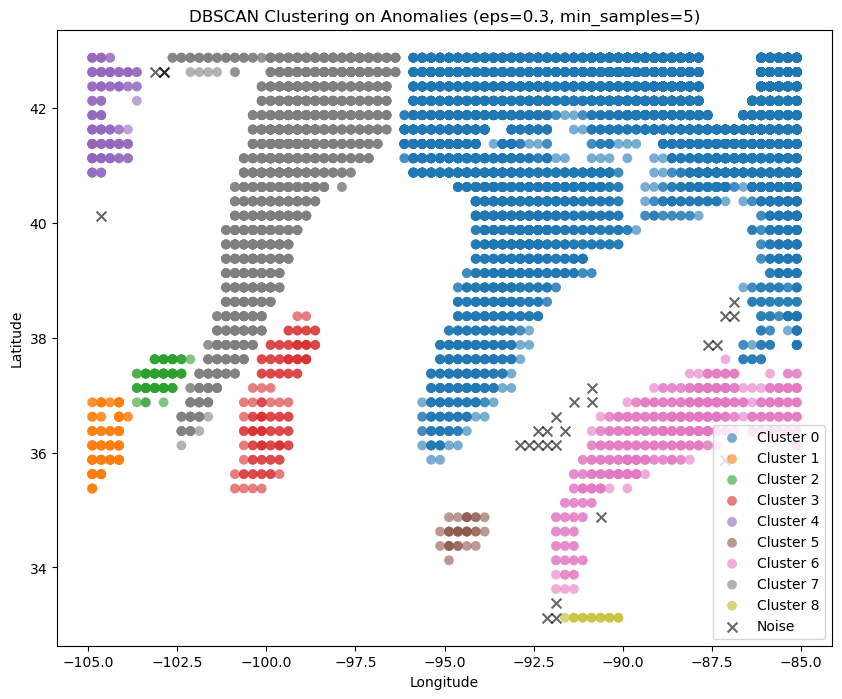

In [46]:
csv_file = "G:/combined_anomalies_sampled.csv" 
df = pd.read_csv(csv_file)

print(f"Loaded {len(df)} anomaly records from {csv_file}.")

coords = df[["lat", "lon"]].values

eps_value = 0.3
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric="euclidean")

cluster_labels = dbscan.fit_predict(coords)
df["cluster"] = cluster_labels

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = np.sum(cluster_labels == -1)

print(f"DBSCAN parameters: eps={eps_value}, min_samples={min_samples_value}")
print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")

cluster_counts = df["cluster"].value_counts().sort_index()
print("\nCluster counts:")
print(cluster_counts)

plt.figure(figsize=(10, 8))
unique_labels = set(cluster_labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    if label == -1:
        color = "k"
        marker = "x"
        label_name = "Noise"
    else:
        color = colors(label)
        marker = "o"
        label_name = f"Cluster {label}"
    
    mask = (df["cluster"] == label)
    plt.scatter(df.loc[mask, "lon"], df.loc[mask, "lat"], 
                c=[color], marker=marker, edgecolors="none", s=50, label=label_name, alpha=0.6)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"DBSCAN Clustering on Anomalies (eps={eps_value}, min_samples={min_samples_value})")
plt.legend()
plt.show()

# output_file = "G:/my_anomalies_clustered.csv"
# df.to_csv(output_file, index=False)
# print(f"Clustered anomaly records saved to {output_file}")

The potential outliers formed 9 clusters in total, with 26 noise points left.

## **4. Correlation Analysis (Sample of 100k rows)**

 Using `df_sample[feature_cols].corr()`, we compute the Pearson correlation for each pair of selected features.

All columns: ['lat', 'lon', 'prcp', 'tavg', 'year', 'month', 'day', 'Swnet_tavg', 'Lwnet_tavg', 'Qg_tavg', 'Evap_tavg', 'Qsm_tavg', 'AvgSurfT_tavg', 'SnowDepth_tavg', 'SoilMoist_P_tavg', 'TVeg_tavg', 'TWS_tavg']
Key columns: ['lat', 'lon', 'year', 'month', 'day']
Feature columns (for correlation): ['prcp', 'tavg', 'Swnet_tavg', 'Lwnet_tavg', 'Qg_tavg', 'Evap_tavg', 'Qsm_tavg', 'AvgSurfT_tavg', 'SnowDepth_tavg', 'SoilMoist_P_tavg', 'TVeg_tavg', 'TWS_tavg']
Data shape after dropping NA: (13914816, 17)
Sampled 100000 rows for correlation analysis.


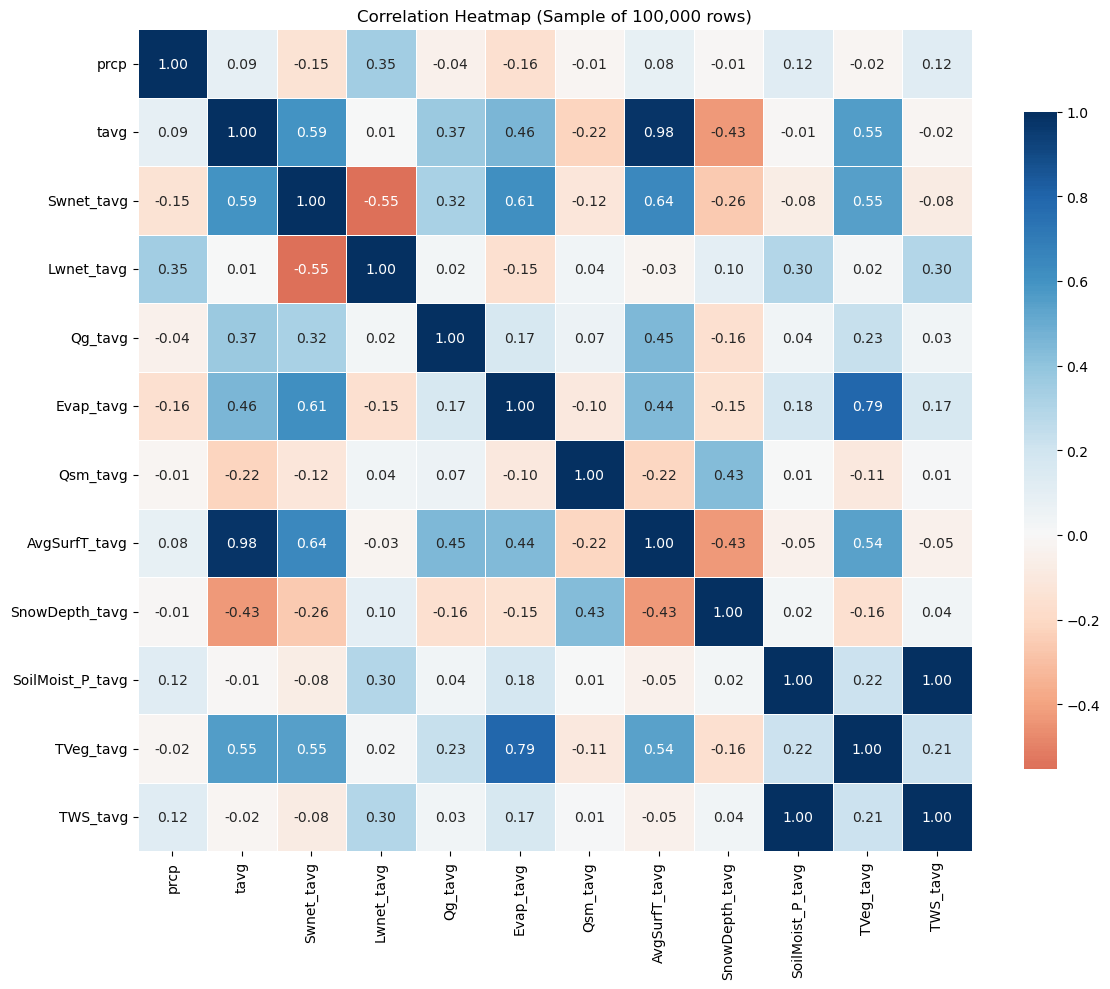


Correlation with prcp:
prcp                1.000000
Lwnet_tavg          0.346664
SoilMoist_P_tavg    0.121076
TWS_tavg            0.121039
tavg                0.092468
AvgSurfT_tavg       0.078982
SnowDepth_tavg     -0.008848
Qsm_tavg           -0.014125
TVeg_tavg          -0.024670
Qg_tavg            -0.044783
Swnet_tavg         -0.145751
Evap_tavg          -0.161495
Name: prcp, dtype: float64

Correlation with tavg:
tavg                1.000000
AvgSurfT_tavg       0.976545
Swnet_tavg          0.594644
TVeg_tavg           0.554938
Evap_tavg           0.455507
Qg_tavg             0.371307
prcp                0.092468
Lwnet_tavg          0.005338
SoilMoist_P_tavg   -0.012678
TWS_tavg           -0.017724
Qsm_tavg           -0.222129
SnowDepth_tavg     -0.428919
Name: tavg, dtype: float64


In [55]:
    csv_file_path = "G:/merged_climate_data.csv"
    df = pd.read_csv(csv_file_path)

    key_cols = ["lat", "lon", "year", "month", "day"]
    all_cols = df.columns.tolist()
    feature_cols = [col for col in all_cols if col not in key_cols]

    print("All columns:", all_cols)
    print("Key columns:", key_cols)
    print("Feature columns (for correlation):", feature_cols)

    df = df.dropna(subset=feature_cols)
    print(f"Data shape after dropping NA: {df.shape}")

    sample_size = min(100000, len(df))
    df_sample = df.sample(n=sample_size, random_state=42)
    print(f"Sampled {sample_size} rows for correlation analysis.")

    corr_matrix = df_sample[feature_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap="RdBu", center=0, annot=True, fmt=".2f",
                linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title("Correlation Heatmap (Sample of 100,000 rows)")
    plt.tight_layout()
    plt.savefig("correlation_heatmap.png")  
    plt.show()

    if "prcp" in corr_matrix.columns:
        print("\nCorrelation with prcp:")
        print(corr_matrix["prcp"].sort_values(ascending=False))
    else:
        print("Column 'prcp' not found in data.")

    if "tavg" in corr_matrix.columns:
        print("\nCorrelation with tavg:")
        print(corr_matrix["tavg"].sort_values(ascending=False))
    else:
        print("Column 'tavg' not found in data.")

1. **Strong Positive Correlations**  
   - `tavg` vs. `AvgSurfT_tavg`: ~0.98  
     - Indicates that near-surface air temperature and average surface temperature move almost in lockstep.  
   - `tavg` vs. `Swnet_tavg`: ~0.59  
     - Suggests higher solar net radiation typically accompanies higher air temperature.  
   - `tavg` vs. `Evap_tavg` / `TVeg_tavg`: moderate-to-strong positive correlations, implying warmer conditions enhance evaporation and transpiration.

2. **`prcp` (Precipitation) Correlations**  
   - `prcp` vs. `Lwnet_tavg`: ~0.35  
     - Possibly related to increased cloud cover or atmospheric moisture during rainy conditions.  
   - `prcp` vs. `SoilMoist_P_tavg` / `TWS_tavg`: ~0.12  
     - Rainfall modestly boosts soil moisture and terrestrial water storage.  
   - Negative correlation with `Swnet_tavg` and `Evap_tavg` (mild), reflecting that rainy periods often coincide with reduced solar flux and less evaporation.

3. **Negative Correlations**  
   - `tavg` vs. `SnowDepth_tavg`: ~-0.43  
     - Warmer temperatures lead to snowmelt, so deeper snow typically corresponds to lower air temperature.  
   - `prcp` vs. `Evap_tavg` or `Swnet_tavg`: small negative correlation, again consistent with cloudier, cooler conditions during rainfall.


We shall **drop the AvgSurfT_tavg** because its almost the same as **tavg**, which would be one of our model prediction targets.

## **5. Model description**

**ConvLSTM** (Convolutional Long Short-Term Memory) is a deep learning model specifically designed to handle spatiotemporal data. It integrates the convolutional operations (commonly used in CNNs) into the LSTM framework to capture both spatial and temporal dependencies simultaneously. 


Key Differences from Standard LSTM
- **Standard LSTM** works with 1D vectors where input, hidden, and cell states are fully connected.
- **ConvLSTM** replaces these vectors with 3D tensors (height, width, channels), preserving spatial relationships in the data.

  Multiple ConvLSTM layers can be stacked to capture higher-level spatiotemporal features. In many applications (e.g., weather forecasting), an encoder-decoder architecture is used where:
  - **Encoder:** Processes historical data sequences.
  - **Decoder:** Predicts future sequences based on the encoded information.

**Input Format:**  
  The model typically expects input data with dimensions:  
  `(batch_size, time_steps, height, width, channels)`.  
  For our weather forecasting, each “frame” should be a weather map (e.g., temperature, precipitation grids).
  
**Target Output:**  
  For a forecasting task, the target is the future sequence (e.g., the next few time steps) corresponding to the past input sequence.

## **6. Next Steps**

For next steps, before model training process, we might go back and fine-turn some of the threholds and eps-values in the outlier detection procedure.

After that, we shall follow the standard model training process. We will set Loss function, Regularizations and optimizers during training process. We will also invlove hyperparameter turining and so on,  and the details of the training process shall depend on the specific situation.

Recently we expect that the **initial function** of our model should be **accurate short-term weather forecasting capability**. 

On this basis, we can expand its capability to **predict long-term weather phenomena** and visualize the result like we did for the first dataset.

We also plan to adjust the weighting of **extreme weather** conditions during training so that the model can more accurately identify and predict such events.